In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_path = r"C:\Users\JITENDRA\Downloads\GWQ_2010-2018_01.xlsx"
df = pd.read_excel(file_path)
# Now you can work with the DataFrame `df` as needed
print(df.head(5))

            SITE_ID WRIS ID   LATITUDE  LONGITUDE SITE_TYPE  \
0  W115159092441001  W23881  11.866389  92.736111  Dug Well   
1               New  W38814  12.186944  92.791667  Dug Well   
2  W123014092513301  W24095  12.503889  92.859167  Dug Well   
3  W123129092581301  W24112  12.524722  92.970278  Dug Well   
4  W123030092573801  W24098  12.508333  92.960556  Dug Well   

            STATE_NAME  DISTRICT_NAME     TAHSIL_NAME       BLOCK_NAME  \
0  Andaman And Nicobar  A & N Islands      Ferrargunj    South Andaman   
1  Andaman And Nicobar  A & N Islands  Middle Andaman  Baratang Island   
2  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   
3  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   
4  Andaman And Nicobar  A & N Islands  Middle Andaman       Mayabunder   

                  SITE_NAME  ... FLUORIDE  SAR  RSC   SiO2  PO4      TDS  \
0        Shoal  Bay– 15 No.  ...     0.37  NaN  NaN  13.97  NaN  217.748   
1  South Creek (Sunderga

In [3]:
new_df = df[['SITE_ID', 'WRIS ID', 'LATITUDE', 'LONGITUDE', 'SITE_TYPE', 'STATE_NAME', 'DISTRICT_NAME', 'TAHSIL_NAME', 'BLOCK_NAME', 'SITE_NAME', 'BASIN_NAME', 'PROJECT_NAME', 'year', 'FE']]


In [4]:
# Convert 'FE' column to float
new_df['FE'] = pd.to_numeric(new_df['FE'], errors='coerce')

C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_7228\2296698088.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['FE'] = pd.to_numeric(new_df['FE'], errors='coerce')


In [5]:
df.shape

(85197, 37)

In [6]:
import re

def convert_coordinates(coord):
    if isinstance(coord, str):
        # Extract degrees, minutes, and seconds from the string
        degrees_minutes_seconds = re.findall(r"\d+\.\d+|\d+", coord)
        
        # Convert degrees, minutes, and seconds to decimal values
        decimal_coord = 0
        if len(degrees_minutes_seconds) > 0:
            decimal_coord += float(degrees_minutes_seconds[0])
        if len(degrees_minutes_seconds) > 1:
            decimal_coord += float(degrees_minutes_seconds[1]) / 60
        if len(degrees_minutes_seconds) > 2:
            decimal_coord += float(degrees_minutes_seconds[2]) / 3600
        
        return decimal_coord
    else:
        return coord


The above provided code is a Python function named convert_coordinates that converts coordinates from a string format to decimal format. Here's a breakdown of the code:

The code begins with an import statement that imports the re module, which is used for regular expression operations.

The convert_coordinates function takes a parameter coord, which represents the coordinate value to be converted.

The function first checks if the coord parameter is of type str using the isinstance function.

If coord is a string, the function uses regular expressions (re.findall) to extract the degrees, minutes, and seconds from the string. The regular expression pattern r"\d+\.\d+|\d+" matches either decimal numbers or integers.

The extracted degrees, minutes, and seconds are then converted to decimal values. The degrees value is added directly to the decimal_coord variable.

If there are additional elements in the degrees_minutes_seconds list (i.e., minutes and/or seconds), the function converts them to decimal values by dividing them by 60 (for minutes) or 3600 (for seconds) and adds them to the decimal_coord variable.

Finally, the function returns the calculated decimal_coord value.

The purpose of this code is to convert coordinates provided as strings in the format "degrees minutes seconds" (e.g., "45° 30' 15.5") to decimal format (e.g., 45.504305). If the coord parameter is not a string, it is returned unchanged.

In [7]:
# Apply the convert_coordinates function to the LATITUDE and LONGITUDE columns
new_df['LATITUDE'] = new_df['LATITUDE'].apply(convert_coordinates)
new_df['LONGITUDE'] = new_df['LONGITUDE'].apply(convert_coordinates)

C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_7228\2379356289.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['LATITUDE'] = new_df['LATITUDE'].apply(convert_coordinates)
C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_7228\2379356289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['LONGITUDE'] = new_df['LONGITUDE'].apply(convert_coordinates)


In [8]:
new_df.isnull().sum()  # count the number of missing values in each column
# Drop duplicates
new_df = new_df.drop_duplicates()
new_df = new_df.dropna()  #removes rows from the DataFrame df that contain missing values (NaN) in any column.
new_df.shape

(28454, 14)

In [9]:
new_df = new_df[new_df['FE'] != 0]  # remove zero value in tds attributes
new_df = new_df[new_df['FE'] != 0.0]
# Remove rows with missing values in the 'TDS' and 'SITE_TYPE' columns
new_df = new_df.dropna(subset=['FE', 'SITE_TYPE'])
new_df.shape

(17784, 14)

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17784 entries, 0 to 85132
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SITE_ID        17784 non-null  object 
 1   WRIS ID        17784 non-null  object 
 2   LATITUDE       17784 non-null  float64
 3   LONGITUDE      17784 non-null  float64
 4   SITE_TYPE      17784 non-null  object 
 5   STATE_NAME     17784 non-null  object 
 6   DISTRICT_NAME  17784 non-null  object 
 7   TAHSIL_NAME    17784 non-null  object 
 8   BLOCK_NAME     17784 non-null  object 
 9   SITE_NAME      17784 non-null  object 
 10  BASIN_NAME     17784 non-null  object 
 11  PROJECT_NAME   17784 non-null  object 
 12  year           17784 non-null  int64  
 13  FE             17784 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 2.0+ MB


In [11]:
new_df['LATITUDE'] = pd.to_numeric(new_df['LATITUDE'], errors='coerce')
new_df['LONGITUDE'] = pd.to_numeric(new_df['LONGITUDE'], errors='coerce')
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17784 entries, 0 to 85132
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SITE_ID        17784 non-null  object 
 1   WRIS ID        17784 non-null  object 
 2   LATITUDE       17784 non-null  float64
 3   LONGITUDE      17784 non-null  float64
 4   SITE_TYPE      17784 non-null  object 
 5   STATE_NAME     17784 non-null  object 
 6   DISTRICT_NAME  17784 non-null  object 
 7   TAHSIL_NAME    17784 non-null  object 
 8   BLOCK_NAME     17784 non-null  object 
 9   SITE_NAME      17784 non-null  object 
 10  BASIN_NAME     17784 non-null  object 
 11  PROJECT_NAME   17784 non-null  object 
 12  year           17784 non-null  int64  
 13  FE             17784 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 2.0+ MB


In [12]:
# Remove rows with non-numerical values ('ND' and 'BDL') in the 'CHLORIDE' column
new_df = new_df[~new_df['FE'].isin(['ND', 'BDL', 'NA'])]
new_df.shape

(17784, 14)

In [13]:
print(new_df[['LATITUDE', 'LONGITUDE', 'FE']])

        LATITUDE  LONGITUDE     FE
0      11.866389  92.736111  1.288
1      12.186944  92.791667  0.125
2      12.503889  92.859167  0.134
3      12.524722  92.970278  0.146
4      12.508333  92.960556  0.122
...          ...        ...    ...
85127  22.199167  87.321389  0.230
85128  22.199167  87.321389  0.560
85130  22.180556  87.150000  6.170
85131  22.180556  87.150000  3.800
85132  22.180556  87.150000  0.190

[17784 rows x 3 columns]


In [14]:
# Assuming you have already loaded and processed the dataset

# Check the range of TDS values
FE_range = new_df['FE'].describe()[['min', 'max']]
print(FE_range)

min     0.001
max    80.592
Name: FE, dtype: float64


In [15]:
new_df.describe()

,LATITUDE,LONGITUDE,year,FE
count,17784.000000,17784.000000,17784.000000,17784.000000
mean,23.531006,80.652015,2015.005286,1.022493
std,4.540954,7.989708,2.382285,2.678593
min,8.083333,68.675000,2010.000000,0.001000
25%,21.066917,74.833333,2013.000000,0.120000
50%,23.515833,79.836806,2016.000000,0.300000
75%,26.459319,85.817500,2017.000000,0.852500
max,34.538611,690.833333,2018.000000,80.592000


In [16]:
# Assuming you already have the data in a DataFrame called 'df'

# Convert latitude and longitude columns to numeric values
new_df['LATITUDE'] = pd.to_numeric(new_df['LATITUDE'])
new_df['LONGITUDE'] = pd.to_numeric(new_df['LONGITUDE'])



In [17]:
# Create a GeoDataFrame using latitude and longitude coordinates
gdf = gpd.GeoDataFrame(new_df, geometry=gpd.points_from_xy(new_df['LONGITUDE'], new_df['LATITUDE']))
states_data = gpd.read_file(r'E:Summer_project\maps-master\States\Admin2.shp')
print(states_data.head(5))

               ST_NM                                           geometry
0  Arunachal Pradesh  POLYGON ((96.08866 29.45997, 96.09428 29.45477...
1              Assam  POLYGON ((95.97166 27.96254, 95.97174 27.96227...
2         Chandigarh  POLYGON ((76.77175 30.79498, 76.77231 30.79420...
3          Karnataka  POLYGON ((77.32647 18.45884, 77.32648 18.45803...
4            Manipur  POLYGON ((94.57315 25.69156, 94.57522 25.69094...


In [18]:
districts_data = gpd.read_file(r'C:\Users\JITENDRA\Downloads\output.dbf')
print(districts_data.head(5))

   objectid statecode    statename state_ut distcode    distname  distarea  \
0         1        05  Uttarakhand    STATE      066    Nainital    4251.0   
1         2        05  Uttarakhand    STATE      060    Dehradun    3088.0   
2         3        05  Uttarakhand    STATE      064      Almora    3144.0   
3         4        05  Uttarakhand    STATE      065   Champawat    1766.0   
4         5        05  Uttarakhand    STATE      056  Uttarkashi    8016.0   

   totalpopul   totalhh  totpopmale  totpopfema    st_areasha     st_lengths  \
0    954605.0  191383.0    493666.0    460939.0  5.322546e+09  506182.695952   
1   1696694.0  347001.0    892199.0    804495.0  4.177236e+09  578188.681639   
2    622506.0  140577.0    291081.0    331425.0  4.140751e+09  463454.225766   
3    259648.0   53953.0    131125.0    128523.0  2.294297e+09  314508.010612   
4    330086.0   67602.0    168597.0    161489.0  1.085166e+10  786425.588972   

                                            geomet

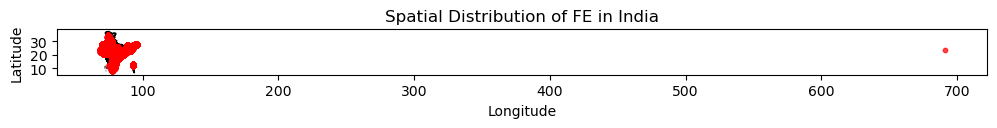

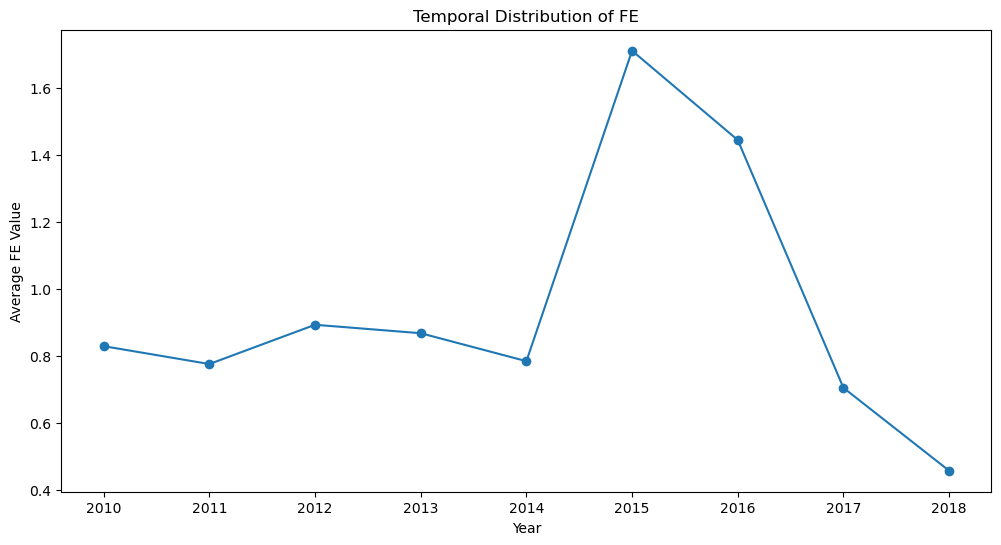

In [19]:
# Assuming you have already loaded and processed the data and shapefiles

# Plot spatial distribution on a map of India
fig, ax = plt.subplots(figsize=(12, 10))

# Plot India map with state boundaries
states_data.plot(ax=ax, color='lightgray', edgecolor='black')

# Overlay FE measurements as points
gdf.plot(ax=ax, markersize=10, color='red', alpha=0.7)

# Customize the map
ax.set_title('Spatial Distribution of FE in India')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display the map
plt.show()

# Plot temporal distribution
fig, ax = plt.subplots(figsize=(12, 6))

# Group FE measurements by year and calculate average FE value
fe_temporal = new_df.groupby('year')['FE'].mean()

# Plot the temporal distribution as a line plot
fe_temporal.plot(ax=ax, marker='o')

# Customize the plot
ax.set_title('Temporal Distribution of FE')
ax.set_xlabel('Year')
ax.set_ylabel('Average FE Value')

# Display the plot
plt.show()


In [20]:
# Merge the FE data with the state boundaries based on a common column (e.g., STATE_NAME)
merged_states = states_data.merge(gdf, left_on='ST_NM', right_on='STATE_NAME', how='left')

# Merge the FE data with the district boundaries based on a common column (e.g., distname)
merged_districts = districts_data.merge(gdf, left_on='distname', right_on='DISTRICT_NAME', how='left')


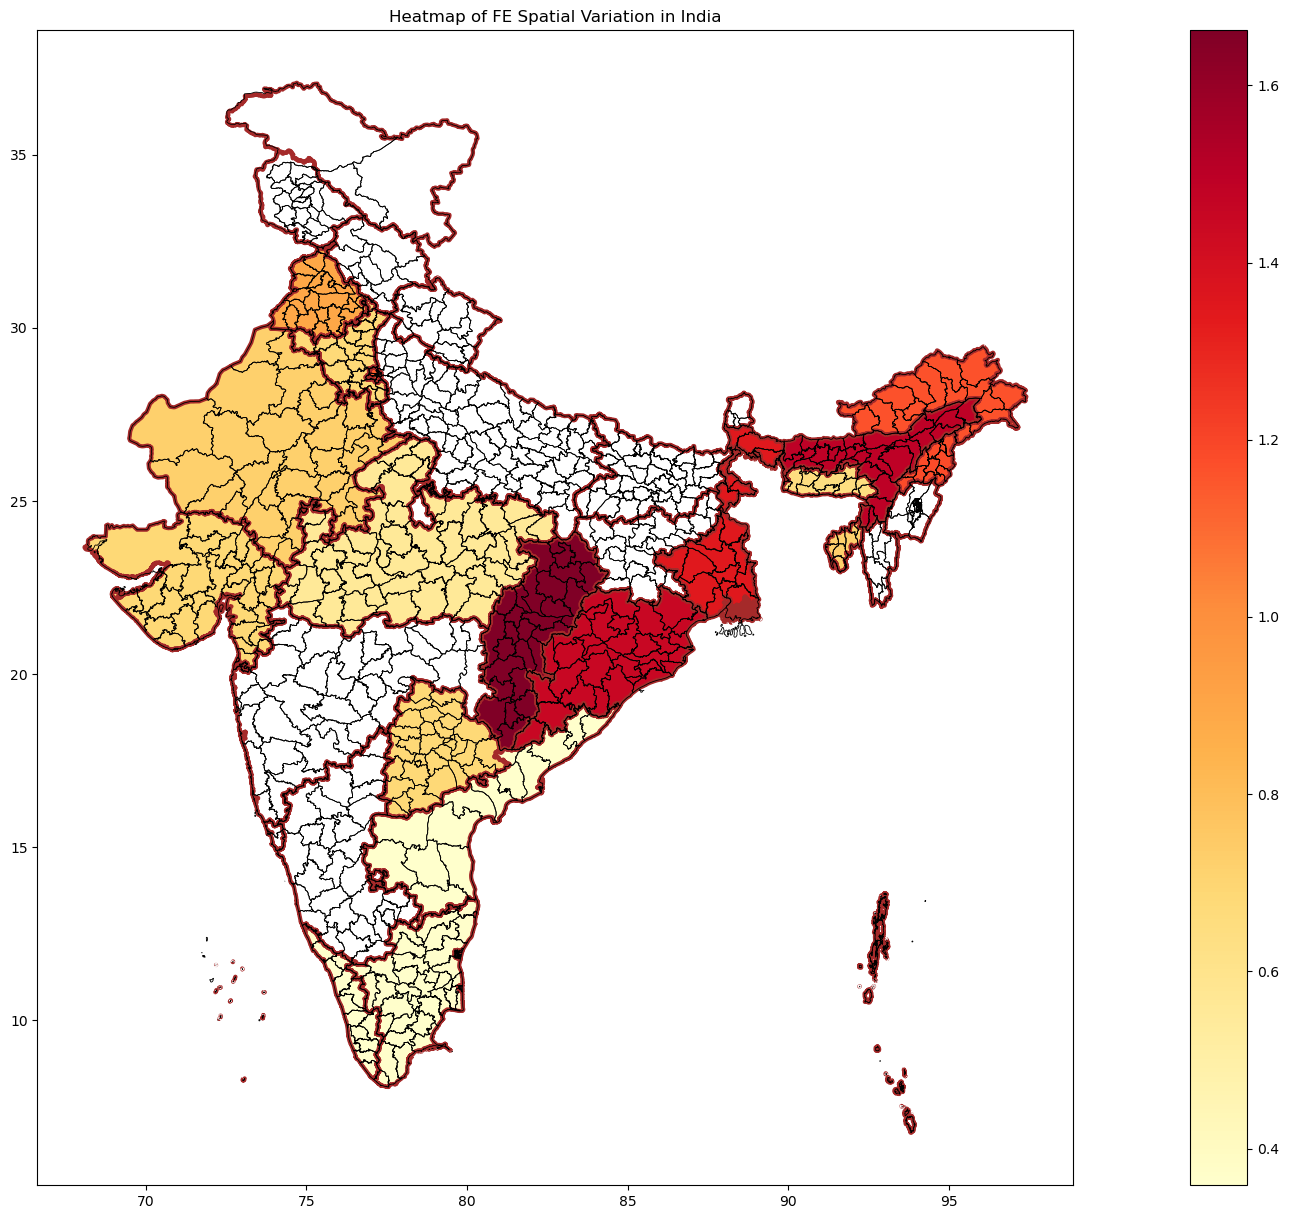

In [21]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefiles for India's states and districts
states_data = gpd.read_file(r'E:\Summer_project\maps-master\States\Admin2.shp')
districts_data = gpd.read_file(r'C:\Users\JITENDRA\Downloads\output.dbf')

# Process and filter the new_df DataFrame as needed
# ...

# Group the data by state and calculate the mean FE value for each state
state_mean_fe = new_df.groupby('STATE_NAME')['FE'].mean().reset_index()

# Merge the calculated mean FE values with the states' geometry from the states_data GeoDataFrame
merged_data = states_data.merge(state_mean_fe, left_on='ST_NM', right_on='STATE_NAME')

# Plot the choropleth map of the mean FE values at the state level
fig, ax = plt.subplots(figsize=(30, 15))
merged_data.plot(column='FE', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
states_data.boundary.plot(ax=ax, linewidth=3.0, color='brown')  # Plot state boundaries
districts_data.boundary.plot(ax=ax, linewidth=0.6, color='black')  # Plot district boundaries
ax.set_title('Heatmap of FE Spatial Variation in India')
plt.show()


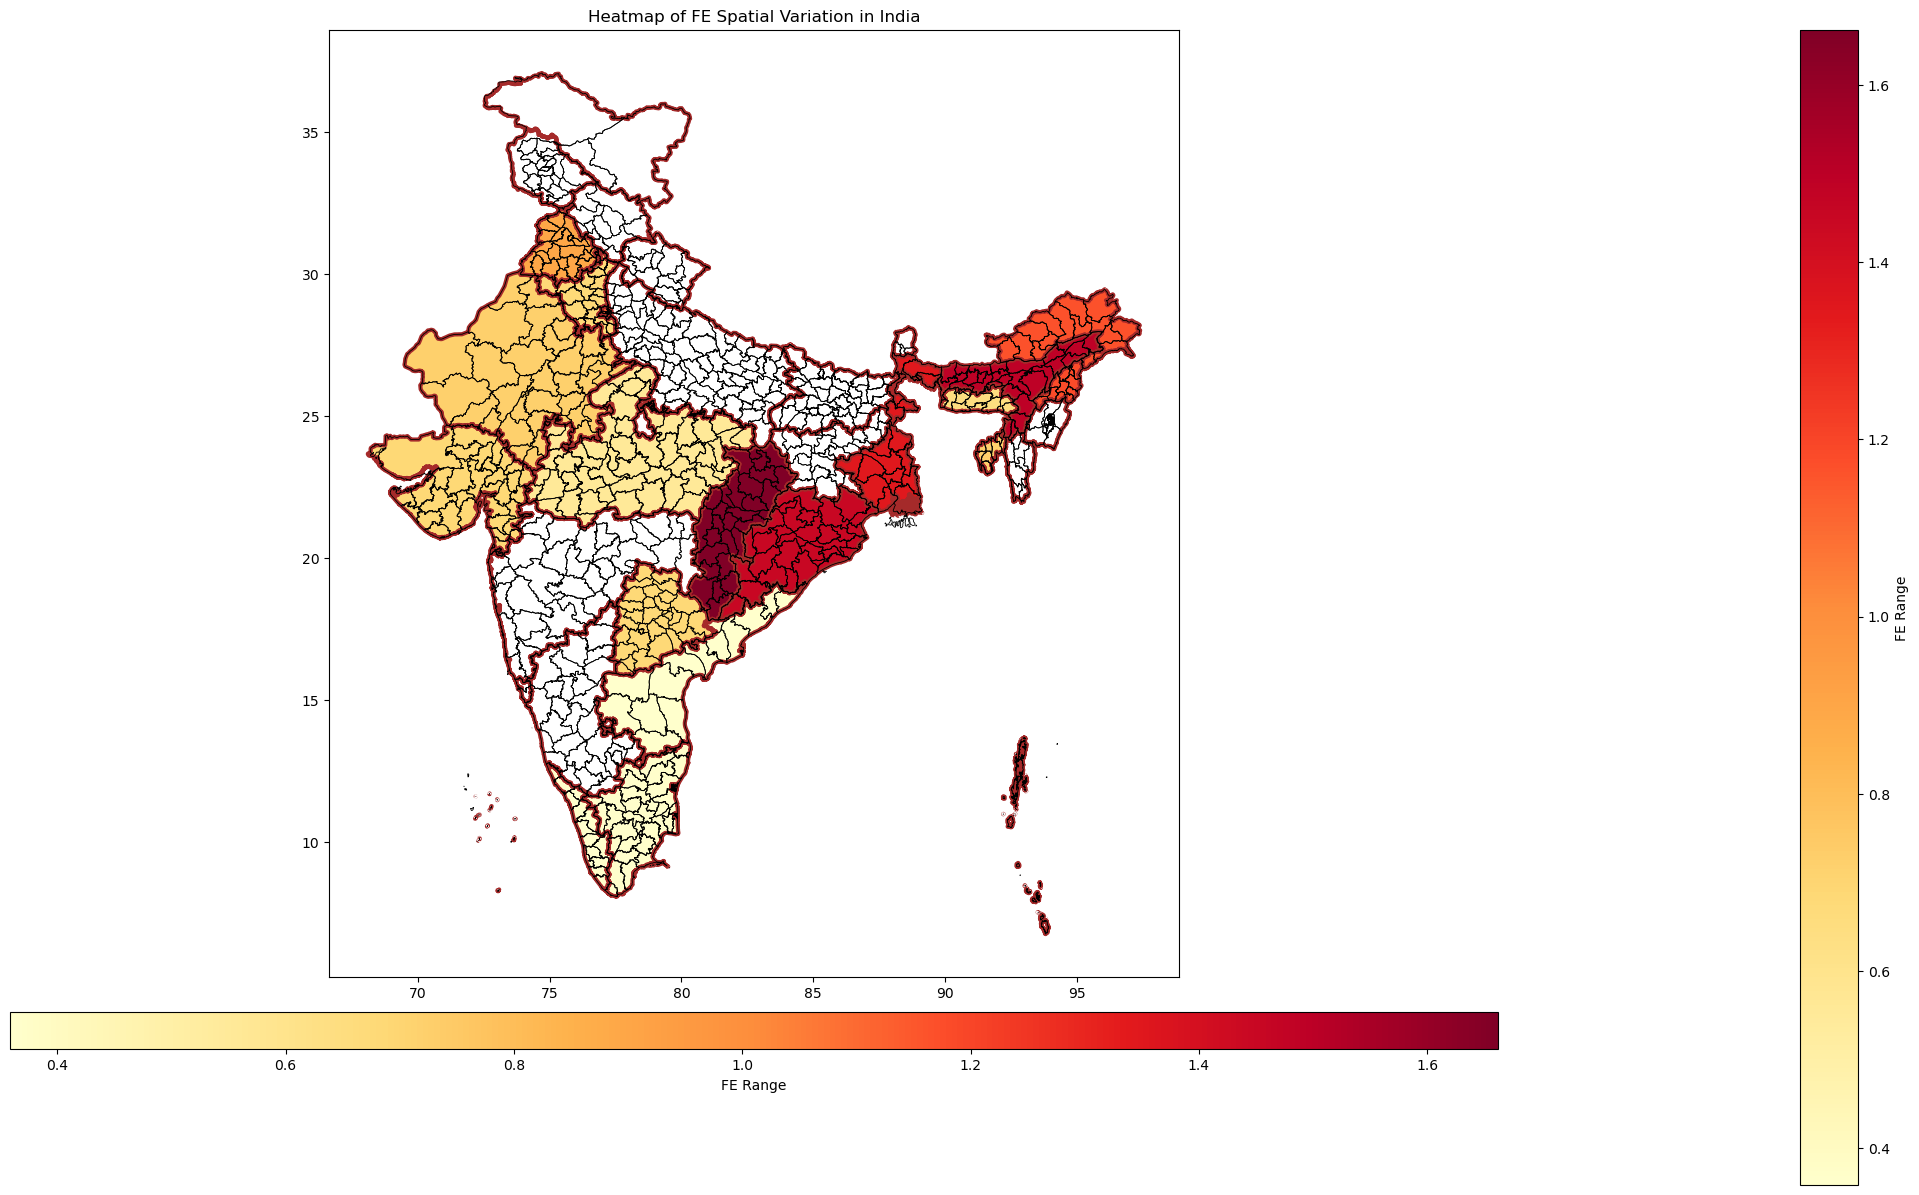

In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefiles for India's states and districts
states_data = gpd.read_file(r'E:\Summer_project\maps-master\States\Admin2.shp')
districts_data = gpd.read_file(r'C:\Users\JITENDRA\Downloads\output.dbf')

# Process and filter the new_df DataFrame as needed
# ...

# Group the data by state and calculate the mean FE value for each state
state_mean_fe = new_df.groupby('STATE_NAME')['FE'].mean().reset_index()

# Merge the calculated mean FE values with the states' geometry from the states_data GeoDataFrame
merged_data = states_data.merge(state_mean_fe, left_on='ST_NM', right_on='STATE_NAME')

# Define the color map and color range for the choropleth map
cmap = 'YlOrRd'
vmin = merged_data['FE'].min()
vmax = merged_data['FE'].max()

# Plot the choropleth map of the mean FE values at the state level
fig, ax = plt.subplots(figsize=(30, 15))
merged_data.plot(column='FE', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': 'FE Range'})
states_data.boundary.plot(ax=ax, linewidth=3.0, color='brown')  # Plot state boundaries
districts_data.boundary.plot(ax=ax, linewidth=0.6, color='black')  # Plot district boundaries

# Add the color legend (symbol rectangular) representing the FE range
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.03, aspect=40, shrink=0.8)
cbar.set_label('FE Range')

ax.set_title('Heatmap of FE Spatial Variation in India')
plt.show()


C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_7228\3703889686.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_scale = plt.cm.get_cmap('YlOrRd')  # Choose a color map


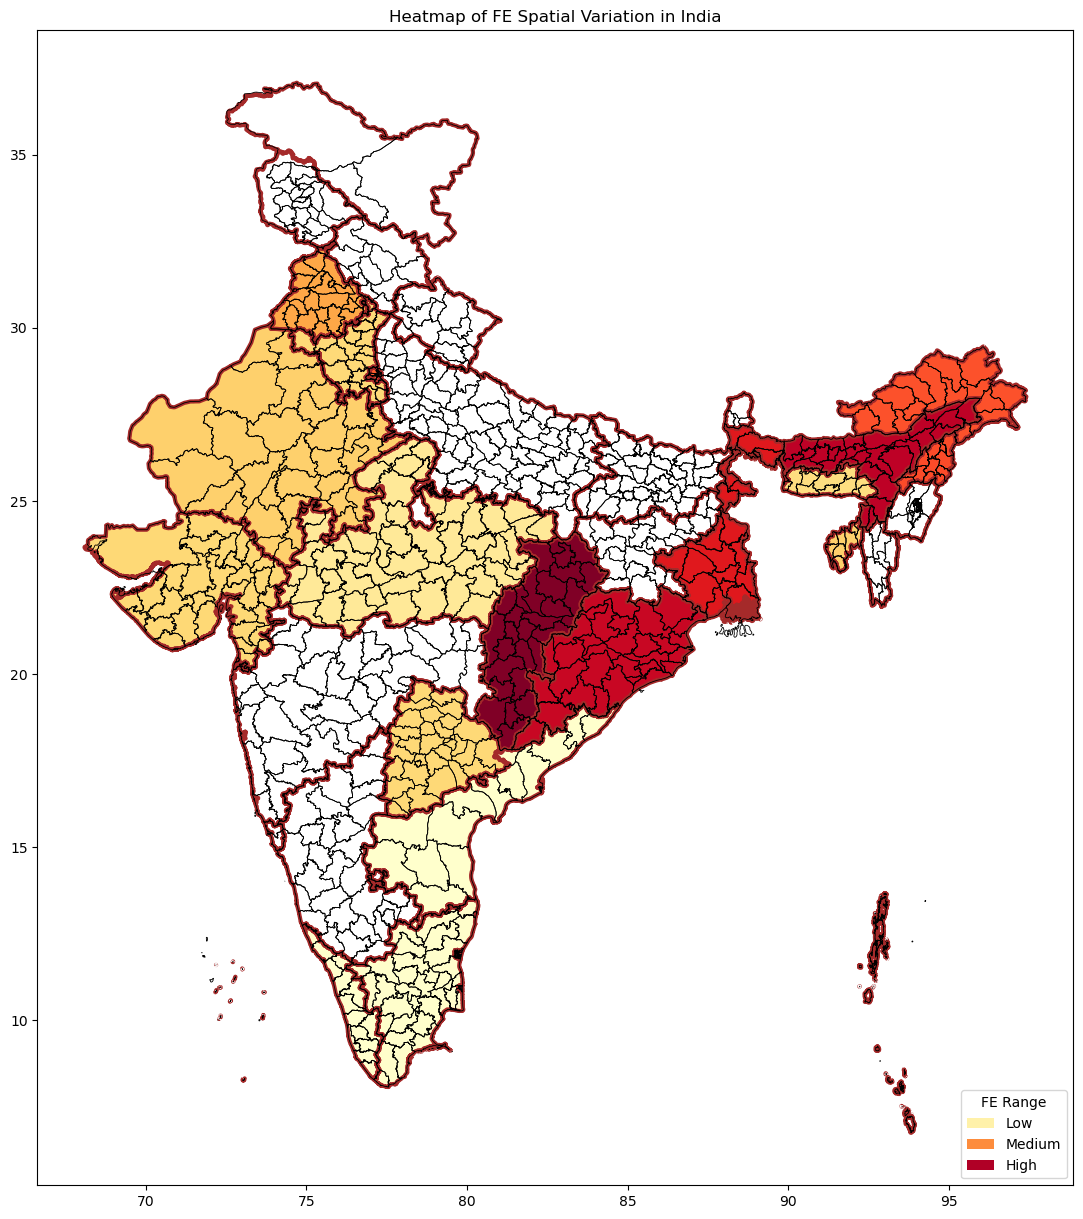

In [23]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load the shapefiles for India's states and districts
states_data = gpd.read_file(r'E:\Summer_project\maps-master\States\Admin2.shp')
districts_data = gpd.read_file(r'C:\Users\JITENDRA\Downloads\output.dbf')

# Process and filter the new_df DataFrame as needed
# ...

# Group the data by state and calculate the mean FE value for each state
state_mean_fe = new_df.groupby('STATE_NAME')['FE'].mean().reset_index()

# Merge the calculated mean FE values with the states' geometry from the states_data GeoDataFrame
merged_data = states_data.merge(state_mean_fe, left_on='ST_NM', right_on='STATE_NAME')

# Define the color scale for the legend
color_scale = plt.cm.get_cmap('YlOrRd')  # Choose a color map
legend_labels = ['Low', 'Medium', 'High']  # Define legend labels

# Plot the choropleth map of the mean FE values at the state level
fig, ax = plt.subplots(figsize=(30, 15))
merged_data.plot(column='FE', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)
states_data.boundary.plot(ax=ax, linewidth=3.0, color='brown')  # Plot state boundaries
districts_data.boundary.plot(ax=ax, linewidth=0.6, color='black')  # Plot district boundaries

# Add a legend with color scale representing the 'FE' range
legend_elements = [Patch(facecolor=color_scale(0.1), label=legend_labels[0]),
                   Patch(facecolor=color_scale(0.5), label=legend_labels[1]),
                   Patch(facecolor=color_scale(0.9), label=legend_labels[2])]
ax.legend(handles=legend_elements, title='FE Range', loc='lower right')

ax.set_title('Heatmap of FE Spatial Variation in India')
plt.show()


C:\Users\JITENDRA\AppData\Local\Temp\ipykernel_7228\2105966588.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_scale = plt.cm.get_cmap('YlOrRd')  # Choose a color map


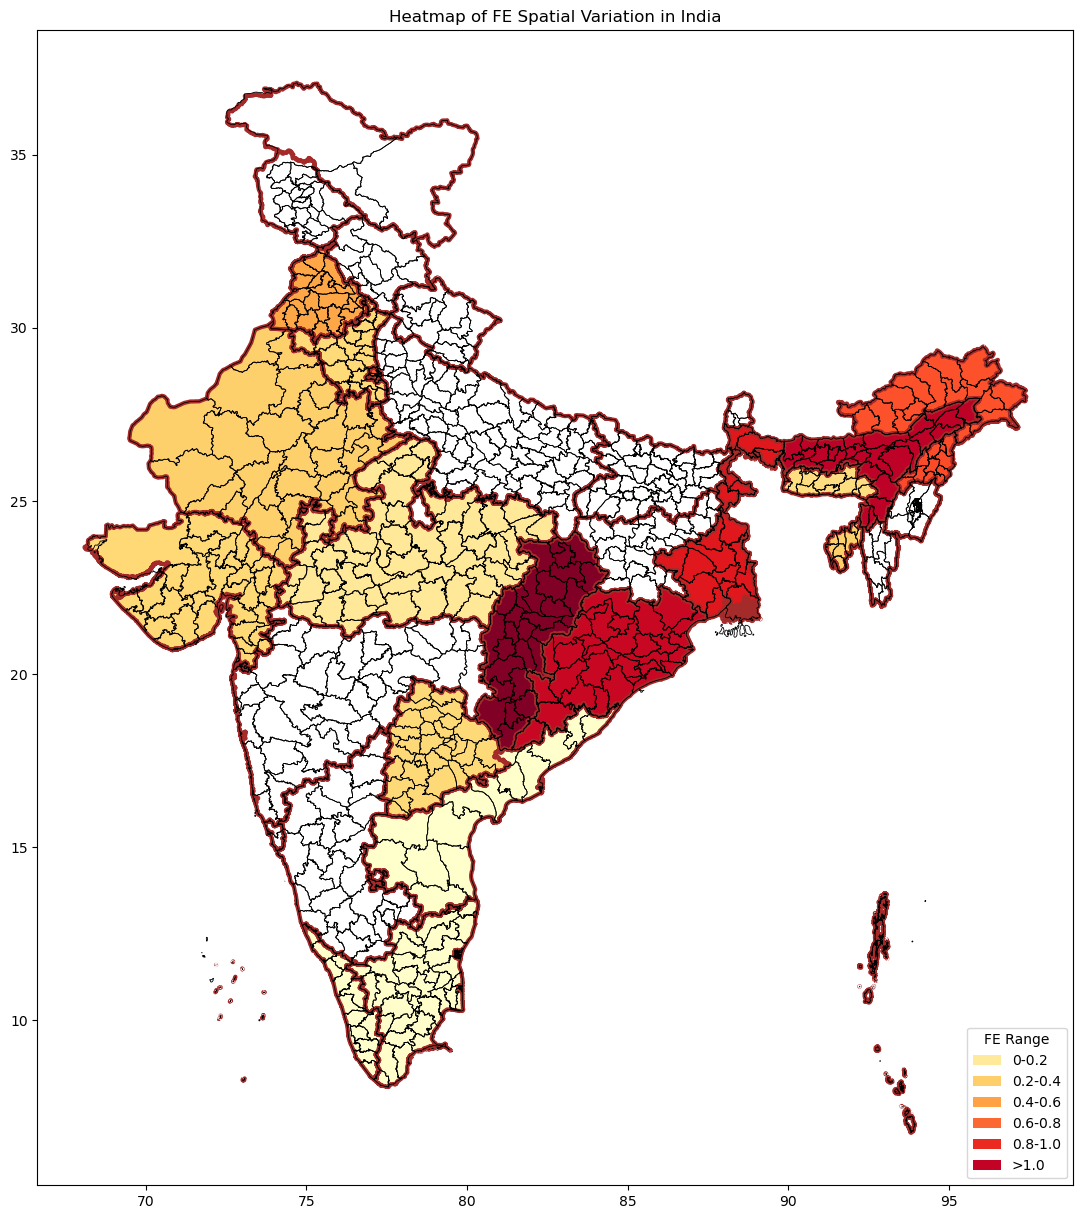

In [25]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load the shapefiles for India's states and districts
states_data = gpd.read_file(r'E:\Summer_project\maps-master\States\Admin2.shp')
districts_data = gpd.read_file(r'C:\Users\JITENDRA\Downloads\output.dbf')

# Process and filter the new_df DataFrame as needed
# ...

# Group the data by state and calculate the mean FE value for each state
state_mean_fe = new_df.groupby('STATE_NAME')['FE'].mean().reset_index()

# Merge the calculated mean FE values with the states' geometry from the states_data GeoDataFrame
merged_data = states_data.merge(state_mean_fe, left_on='ST_NM', right_on='STATE_NAME')

# Define the color scale for the legend
color_scale = plt.cm.get_cmap('YlOrRd')  # Choose a color map
legend_ranges = [(0, 0.2), (0.2, 0.4), (0.4, 0.6), (0.6, 0.8), (0.8, 1.0), (1.0, float('inf'))]  # Define 'FE' ranges
legend_labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0', '>1.0']  # Define legend labels

# Plot the choropleth map of the mean FE values at the state level
fig, ax = plt.subplots(figsize=(30, 15))
merged_data.plot(column='FE', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False)
states_data.boundary.plot(ax=ax, linewidth=3.0, color='brown')  # Plot state boundaries
districts_data.boundary.plot(ax=ax, linewidth=0.6, color='black')  # Plot district boundaries

# Add a legend with color scale representing the 'FE' ranges
legend_elements = []
for i, (range_min, range_max) in enumerate(legend_ranges):
    legend_elements.append(Patch(facecolor=color_scale((i + 1) / (len(legend_ranges) + 1)), label=legend_labels[i]))
ax.legend(handles=legend_elements, title='FE Range', loc='lower right')

ax.set_title('Heatmap of FE Spatial Variation in India')
plt.show()
